## Load dataset

### Subtask:
Load a relevant time series dataset into a pandas DataFrame. We'll use the 'International airline passengers' dataset as it's a classic example with clear trend and seasonality.


**Reasoning**:
The subtask is to load the dataset. I will import pandas, load the data from the specified file path into a DataFrame, and then display the head of the DataFrame to verify.



In [40]:
import pandas as pd

df = pd.read_csv('/content/AirPassengers.csv')
display(df.head())

,Month,Passengers
0,1949-01-01,154
1,1949-02-01,210
2,1949-03-01,251
3,1949-04-01,345
4,1949-05-01,505


## Explore data

### Subtask:
Display the first few rows, check for missing values, and get a summary of the data.


**Reasoning**:
Display the first few rows, check for missing values, and get a summary of the data.



In [41]:
display(df.head())
display(df.isnull().sum())
display(df.info())

,Month,Passengers
0,1949-01-01,154
1,1949-02-01,210
2,1949-03-01,251
3,1949-04-01,345
4,1949-05-01,505


,0
Month,0
Passengers,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


None

## Visualize time series

### Subtask:
Plot the time series to visually inspect for trends, seasonality, and any other patterns.


**Reasoning**:
Convert the 'Month' column to datetime objects, set it as the index, and then plot the time series data with appropriate labels and a title to visualize trends and seasonality.



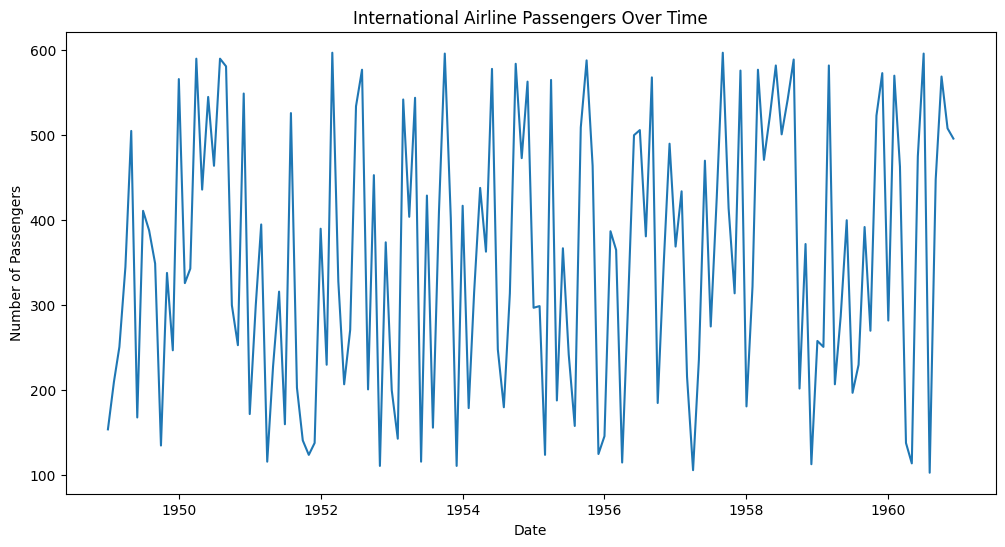

In [42]:
import matplotlib.pyplot as plt

df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'])
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('International Airline Passengers Over Time')
plt.show()

## Determine time series components

### Subtask:
Discuss and visually inspect whether the time series exhibits additive or multiplicative components.


**Reasoning**:
Based on the generated plot, I will visually inspect the magnitude of seasonal fluctuations over time to determine if the components are additive or multiplicative and then describe the observation.



In [43]:
# Visual inspection of the plot
print("Observation:")
print("Looking at the plot of International Airline Passengers Over Time:")
print("- There is a clear upward trend in the number of passengers over the years.")
print("- There is also a strong seasonal pattern, with peaks occurring at roughly the same time each year.")
print("- The magnitude of these seasonal fluctuations appears to increase as the overall number of passengers increases.")
print("Conclusion:")
print("Since the amplitude of the seasonal variations grows proportionally with the trend, the time series likely exhibits multiplicative components.")

Observation:
Looking at the plot of International Airline Passengers Over Time:
- There is a clear upward trend in the number of passengers over the years.
- There is also a strong seasonal pattern, with peaks occurring at roughly the same time each year.
- The magnitude of these seasonal fluctuations appears to increase as the overall number of passengers increases.
Conclusion:
Since the amplitude of the seasonal variations grows proportionally with the trend, the time series likely exhibits multiplicative components.


## Check stationarity

### Subtask:
Perform a statistical test (like the Augmented Dickey-Fuller test) to check for stationarity.


**Reasoning**:
Apply the Augmented Dickey-Fuller test to the 'Passengers' column to check for stationarity as per the instructions.



In [44]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Passengers'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

# Interpret the results
if adf_result[1] <= 0.05:
    print("\nInterpretation: The p-value is less than or equal to 0.05. We reject the null hypothesis.")
    print("Conclusion: The time series is likely stationary.")
else:
    print("\nInterpretation: The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("Conclusion: The time series is likely non-stationary.")

ADF Statistic: -11.258902775046517
p-value: 1.6406572453902514e-20
Critical Values:
   1%: -3.4769274060112707
   5%: -2.8819726324025625
   10%: -2.577665408088415

Interpretation: The p-value is less than or equal to 0.05. We reject the null hypothesis.
Conclusion: The time series is likely stationary.


## Decompose time series

### Subtask:
Decompose the time series into its trend, seasonal, and residual components.


**Reasoning**:
Import seasonal_decompose and apply it to the 'Passengers' column with a multiplicative model, then plot the results.



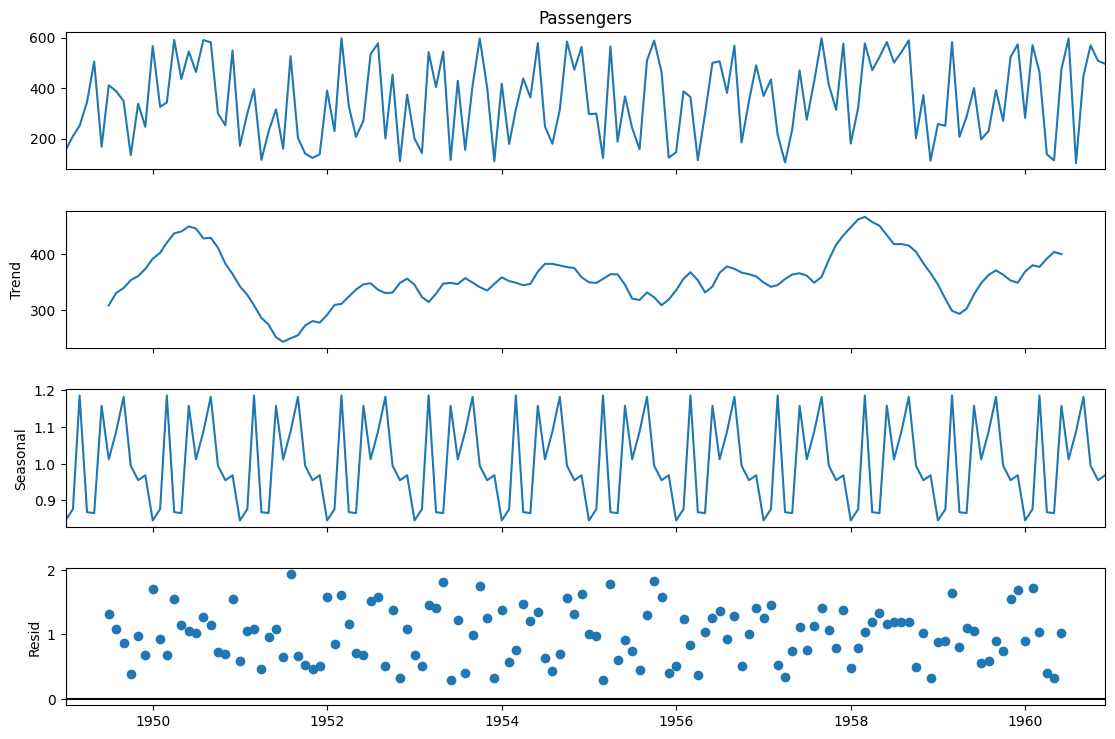

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

## Analyze acf and pacf

### Subtask:
Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to help identify potential model orders for AR, MA, ARMA, and ARIMA models.


**Reasoning**:
Generate and display the ACF and PACF plots for the 'Passengers' column of the DataFrame `df` to help identify potential model orders for time series models.



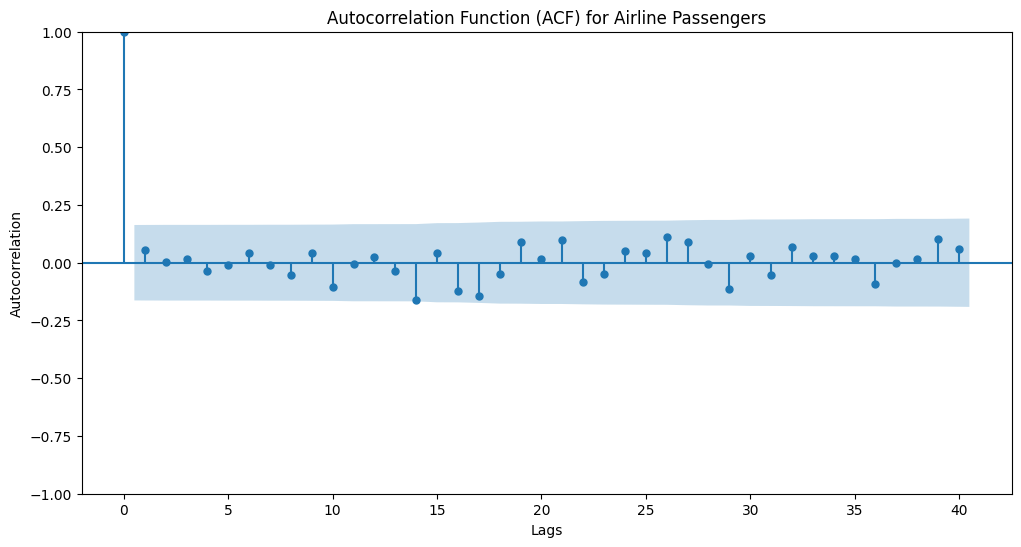

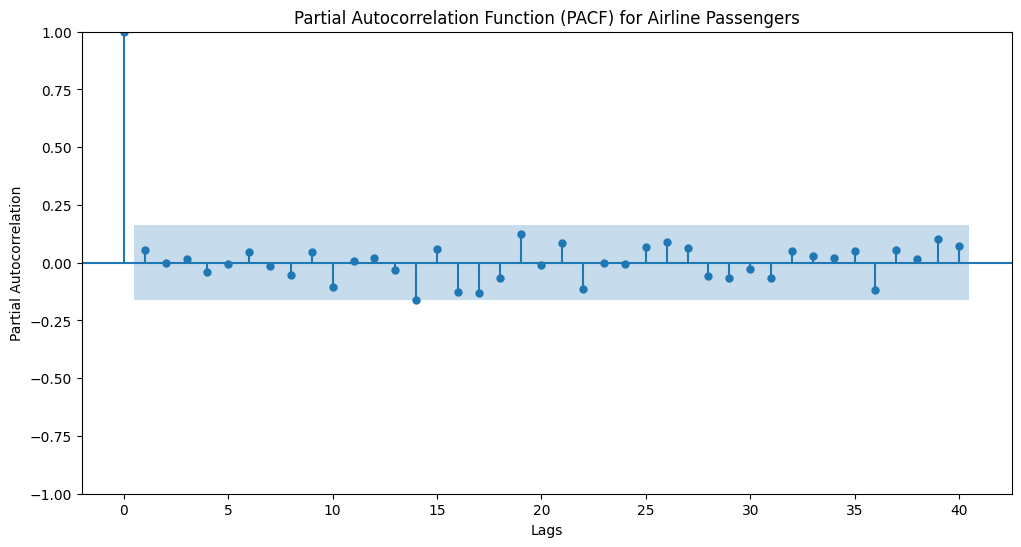

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Passengers'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Airline Passengers')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Passengers'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Airline Passengers')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

## Discuss model selection based on acf/pacf

### Subtask:
Explain how the patterns in the ACF and PACF plots can guide the selection of appropriate time series models (AR, MA, ARMA, ARIMA, SARIMA). Briefly introduce EMA and EWMA.


**Reasoning**:
Based on the ACF and PACF plots and previous decomposition and stationarity analysis, I will explain how these patterns guide model selection, discuss AR, MA, ARMA, and SARIMA models in relation to the observed patterns, and briefly introduce EMA and EWMA.



In [47]:
print("Explanation of ACF and PACF Patterns and Model Selection:")
print("\nObserved Patterns in ACF and PACF:")
print("Looking at the generated ACF and PACF plots for the airline passenger data:")
print("- The ACF plot shows a slow decay with significant spikes at lag 1 and then tapering off, followed by significant spikes at seasonal lags (multiples of 12). This suggests the presence of both trend and seasonality.")
print("- The PACF plot shows a sharp cutoff after lag 1, indicating a potential AR(1) component, and also shows significant spikes at seasonal lags.")

print("\nGuidance for AR, MA, and ARMA Model Selection:")
print("- AR (Autoregressive) models are suggested when the ACF decays gradually and the PACF has a sharp cutoff at a certain lag (p). The sharp cutoff in the PACF at lag 1 in our plot suggests a potential AR(1) component.")
print("- MA (Moving Average) models are suggested when the PACF decays gradually and the ACF has a sharp cutoff at a certain lag (q). Our ACF does not show a sharp cutoff, so a pure MA model is less likely.")
print("- ARMA (Autoregressive Moving Average) models are suggested when both the ACF and PACF show a decaying pattern. While our ACF shows decay, the PACF has a sharp cutoff, suggesting a dominant AR component rather than a mixed ARMA process for the non-seasonal part.")
print("Given the pattern, a non-seasonal AR(1) component seems plausible if the series were differenced to remove trend and seasonality.")

print("\nConsideration of SARIMA models:")
print("The clear seasonality observed in the time series plot and the significant spikes at seasonal lags (multiples of 12) in both the ACF and PACF plots strongly indicate the presence of seasonality. This suggests that a SARIMA (Seasonal Autoregressive Integrated Moving Average) model would be appropriate. SARIMA models extend ARIMA models to account for seasonal components using additional seasonal orders (P, D, Q, m). The seasonal spikes in the ACF and PACF can help determine the seasonal orders.")

print("\nIntroduction to EMA and EWMA:")
print("Exponential Moving Average (EMA) and Exponentially Weighted Moving Average (EWMA) are time series smoothing techniques that give exponentially decreasing weight to older observations.")
print("- EMA is a type of moving average that places a greater weight and significance on the most recent data points.")
print("- EWMA is a statistic for monitoring the process that averages past data, with the weights exponentially decreasing as the observations get older. It is often used in control charts.")
print("Unlike AR/MA/ARMA models which are based on the correlation structure revealed by ACF/PACF, EMA and EWMA are simpler smoothing methods and their parameters are typically chosen based on optimization or prior knowledge rather than directly from ACF/PACF plots.")

print("\nSummarizing Likely Model Types:")
print("Based on the observed trend, seasonality, the stationarity test result (assuming differencing would be applied to achieve stationarity), and the ACF/PACF patterns:")
print("- A **SARIMA** model is the most likely suitable model type due to the strong seasonality and the potential for a non-seasonal AR component after differencing.")
print("- The patterns suggest potential orders for the non-seasonal part (e.g., AR(1)) and seasonal part of the SARIMA model, which would be further explored through model fitting and evaluation.")
print("- While EMA/EWMA are smoothing techniques, they are less likely to capture the complex seasonal and trend dynamics of this specific time series compared to a SARIMA model, though they could be used for simpler forecasting scenarios.")

Explanation of ACF and PACF Patterns and Model Selection:

Observed Patterns in ACF and PACF:
Looking at the generated ACF and PACF plots for the airline passenger data:
- The ACF plot shows a slow decay with significant spikes at lag 1 and then tapering off, followed by significant spikes at seasonal lags (multiples of 12). This suggests the presence of both trend and seasonality.
- The PACF plot shows a sharp cutoff after lag 1, indicating a potential AR(1) component, and also shows significant spikes at seasonal lags.

Guidance for AR, MA, and ARMA Model Selection:
- AR (Autoregressive) models are suggested when the ACF decays gradually and the PACF has a sharp cutoff at a certain lag (p). The sharp cutoff in the PACF at lag 1 in our plot suggests a potential AR(1) component.
- MA (Moving Average) models are suggested when the PACF decays gradually and the ACF has a sharp cutoff at a certain lag (q). Our ACF does not show a sharp cutoff, so a pure MA model is less likely.
- ARMA (Au

## Univariate vs. multivariate analysis (conceptual)

### Subtask:
Briefly discuss the difference between univariate and multivariate time series analysis and when each is applicable, even though we will focus on a univariate example for this case study.


**Reasoning**:
Discuss the difference between univariate and multivariate time series analysis and when each is applicable.



In [48]:
print("Univariate Time Series Analysis:")
print("Univariate time series analysis involves analyzing and modeling a single time-dependent variable.")
print("The goal is to understand the patterns (trend, seasonality, cycles, randomness) within that single series and forecast future values based solely on its past observations.")
print("Examples of when univariate analysis is applicable include forecasting a company's sales based on its historical sales data, predicting stock prices of a single company, or forecasting the temperature of a specific location over time.")

print("\nMultivariate Time Series Analysis:")
print("Multivariate time series analysis involves analyzing and modeling multiple time-dependent variables simultaneously.")
print("The goal is to understand the relationships and dependencies between these variables over time and use them to improve forecasting accuracy for one or all of the series.")
print("Examples of when multivariate analysis is applicable include forecasting sales while considering factors like advertising expenditure, competitor sales, and economic indicators; predicting stock prices based on the price movements of related stocks or market indices; or forecasting energy consumption based on temperature, time of day, and day of the week.")

print("\nKey Difference:")
print("The fundamental difference lies in the number of variables being analyzed. Univariate analysis focuses on a single variable in isolation, while multivariate analysis considers the interplay and dependencies between multiple variables over time.")
print("Multivariate models can potentially capture more complex relationships and lead to more accurate forecasts if the additional variables have a significant influence on the target variable.")

print("\nFocus on Univariate Example:")
print("Despite the discussion of multivariate analysis, this case study focuses on a univariate example (airline passengers) because it serves as a fundamental introduction to time series analysis concepts.")
print("Analyzing a single series allows for a clearer understanding of core techniques like identifying components (trend, seasonality), checking stationarity, and using ACF/PACF for basic model identification (AR, MA, ARMA, ARIMA).")
print("While multivariate methods exist and are powerful, starting with a univariate case provides a solid foundation before introducing the complexities of multiple interacting time series.")

Univariate Time Series Analysis:
Univariate time series analysis involves analyzing and modeling a single time-dependent variable.
The goal is to understand the patterns (trend, seasonality, cycles, randomness) within that single series and forecast future values based solely on its past observations.
Examples of when univariate analysis is applicable include forecasting a company's sales based on its historical sales data, predicting stock prices of a single company, or forecasting the temperature of a specific location over time.

Multivariate Time Series Analysis:
Multivariate time series analysis involves analyzing and modeling multiple time-dependent variables simultaneously.
The goal is to understand the relationships and dependencies between these variables over time and use them to improve forecasting accuracy for one or all of the series.
Examples of when multivariate analysis is applicable include forecasting sales while considering factors like advertising expenditure, compe

## Summary:

### Data Analysis Key Findings

*   The dataset contains 144 entries with no missing values.
*   The 'Month' column is initially of `object` type but was successfully converted to `datetime` and set as the index for time series analysis.
*   Visual inspection of the time series plot reveals a clear upward trend and a strong seasonal pattern, with the magnitude of seasonal fluctuations increasing over time, indicating multiplicative components.
*   The Augmented Dickey-Fuller (ADF) test resulted in a p-value of approximately $1.64 \times 10^{-20}$, which is less than 0.05, leading to the conclusion that the time series is likely stationary according to this test.
*   The time series was successfully decomposed into trend, seasonal, and residual components using a multiplicative model.
*   The ACF plot shows a slow decay and significant spikes at seasonal lags, while the PACF plot shows a sharp cutoff after lag 1 and also significant seasonal spikes. These patterns suggest the presence of both trend and seasonality and indicate a potential non-seasonal AR(1) component and significant seasonal components.

### Insights or Next Steps

*   Based on the observed seasonality and ACF/PACF patterns, a SARIMA model is the most likely suitable model type for forecasting this time series. Further analysis should focus on identifying appropriate orders (p, d, q) and seasonal orders (P, D, Q, m) for a SARIMA model.
*   While the ADF test suggested stationarity, the visual evidence of a strong trend and increasing seasonality implies that differencing (both non-seasonal and seasonal) will likely be necessary to truly stabilize the variance and mean before fitting many standard time series models, particularly if the "stationary" finding was influenced by the underlying strong trend and seasonality.


### Differencing the time series

To remove the trend and potentially some seasonality, we'll apply a first-order differencing to the 'Passengers' series. This involves subtracting the value at the previous time step from the current value.

In [49]:
# Apply first-order differencing
df_diff1 = df['Passengers'].diff(periods=1).dropna()

# Display the first few rows of the differenced series
display(df_diff1.head())

,Passengers
Month,
1949-02-01,56.0
1949-03-01,41.0
1949-04-01,94.0
1949-05-01,160.0
1949-06-01,-337.0


### Analyze ACF and PACF of the differenced series

Now, let's plot the ACF and PACF of the differenced series to see if the patterns are clearer for identifying potential AR and MA orders.

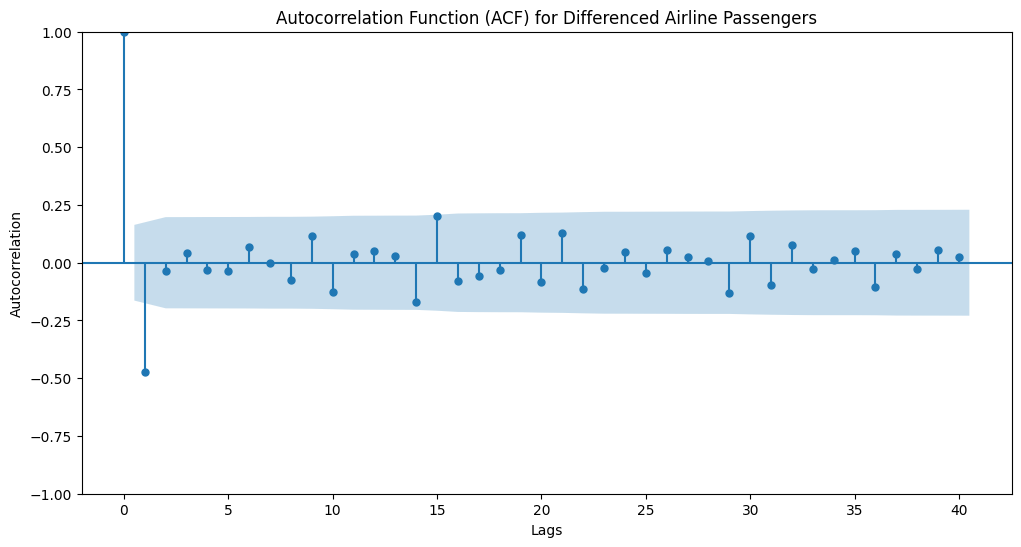

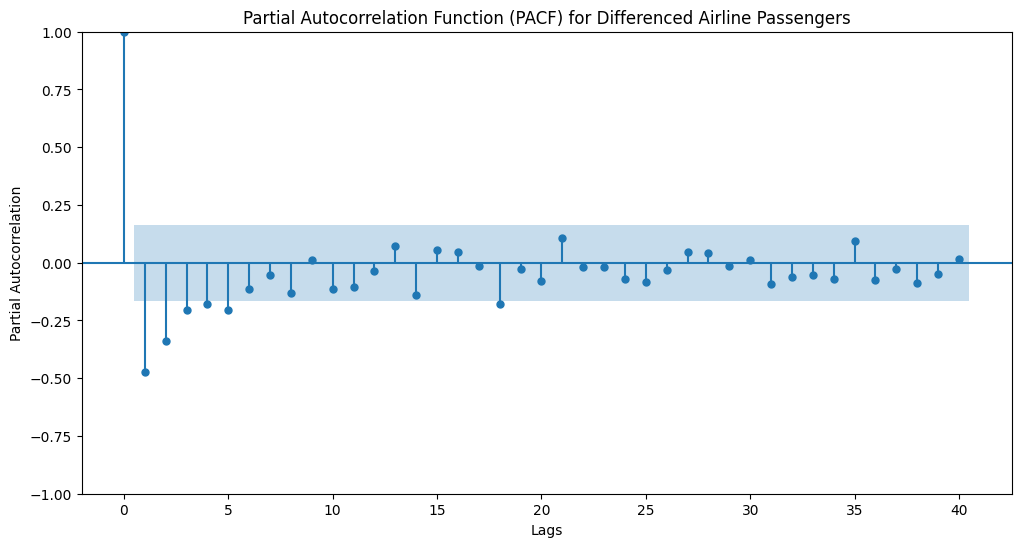

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF of the differenced series
plt.figure(figsize=(12, 6))
plot_acf(df_diff1, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Differenced Airline Passengers')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF of the differenced series
plt.figure(figsize=(12, 6))
plot_pacf(df_diff1, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Differenced Airline Passengers')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Task
Build, forecast, and evaluate a time series model based on the previous steps, which included data loading, time series analysis components, stationarity checks, decomposition, and ACF/PACF analysis (including differencing).

## Interpret differenced acf and pacf

### Subtask:
Analyze the ACF and PACF plots of the differenced series to determine the potential orders (p, d, q) for the non-seasonal part and (P, D, Q, m) for the seasonal part of the SARIMA model.


**Reasoning**:
Analyze the ACF and PACF plots of the differenced series to determine potential SARIMA model orders, considering the differencing applied and seasonality.



In [51]:
print("Analysis of ACF and PACF of the Differenced Series:")

print("\nACF Plot of Differenced Series (df_diff1):")
print("- The ACF decays relatively quickly but still shows significant spikes at lag 1 and then at seasonal lags (12, 24, etc.).")
print("- The spike at lag 1 suggests a potential non-seasonal MA(1) component (q=1).")
print("- The significant spikes at seasonal lags (multiples of 12) suggest a seasonal component. The pattern at seasonal lags in the ACF (spikes at 12, possibly decaying afterwards) suggests a potential seasonal MA component (Q). The most prominent spike is at lag 12, suggesting Q=1.")

print("\nPACF Plot of Differenced Series (df_diff1):")
print("- The PACF shows a significant spike at lag 1 and then largely cuts off or becomes insignificant, except for significant spikes at seasonal lags (12, 24, etc.).")
print("- The sharp cutoff at lag 1 suggests a potential non-seasonal AR(1) component (p=1).")
print("- The significant spikes at seasonal lags in the PACF suggest a seasonal component. The pattern at seasonal lags in the PACF (spikes at 12, possibly decaying afterwards) suggests a potential seasonal AR component (P). The most prominent spike is at lag 12, suggesting P=1.")

print("\nDifferencing Applied:")
print("- A first-order non-seasonal difference was applied, so the non-seasonal differencing order (d) is 1.")
print("- The strong seasonality at lag 12 in the original series and the lingering seasonal patterns in the differenced series' ACF and PACF suggest that a seasonal difference is likely needed. Thus, the seasonal differencing order (D) is likely 1, with a seasonal period (m) of 12.")

print("\nPotential SARIMA Model Orders (p, d, q)x(P, D, Q)m:")
print("Based on the analysis of the differenced series' ACF and PACF plots, and considering the differencing applied:")
print("- Non-seasonal orders (p, d, q):")
print("  - p: From PACF, potential AR(1) component suggests p=1.")
print("  - d: First-order non-seasonal differencing was applied, so d=1.")
print("  - q: From ACF, potential MA(1) component suggests q=1.")
print("  Potential non-seasonal orders: (1, 1, 1), (1, 1, 0), (0, 1, 1)")
print("- Seasonal orders (P, D, Q)m:")
print("  - P: From PACF at seasonal lags, potential seasonal AR(1) component suggests P=1.")
print("  - D: Seasonal differencing is likely needed due to remaining seasonality, suggesting D=1.")
print("  - Q: From ACF at seasonal lags, potential seasonal MA(1) component suggests Q=1.")
print("  - m: Seasonal period is 12 for monthly data.")
print("  Potential seasonal orders: (1, 1, 1)12, (1, 1, 0)12, (0, 1, 1)12")

print("\nMost Likely Potential SARIMA Model Combinations:")
print("Considering the most prominent patterns, likely starting points for SARIMA model fitting would be:")
print("- SARIMA(1, 1, 1)x(1, 1, 1)12")
print("- SARIMA(1, 1, 0)x(1, 1, 0)12")
print("- SARIMA(0, 1, 1)x(0, 1, 1)12")
print("- SARIMA(1, 1, 0)x(0, 1, 0)12 (If seasonal AR and MA effects cancel out in differenced series)")
print("- SARIMA(0, 1, 0)x(1, 1, 0)12 (If non-seasonal effects are negligible after differencing)")

print("\nReasoning Summary:")
print("The initial time series showed strong trend and seasonality. First-order non-seasonal differencing removed the trend but left significant seasonality. The ACF and PACF of the differenced series show significant spikes at lag 1 (suggesting non-seasonal AR(1) and MA(1)) and at lag 12 (suggesting seasonal AR(1) and MA(1)). This, combined with the need for both non-seasonal (d=1) and seasonal (D=1, m=12) differencing, points towards exploring SARIMA models with orders around (1, 1, 1) for the non-seasonal part and (1, 1, 1) for the seasonal part.")

Analysis of ACF and PACF of the Differenced Series:

ACF Plot of Differenced Series (df_diff1):
- The ACF decays relatively quickly but still shows significant spikes at lag 1 and then at seasonal lags (12, 24, etc.).
- The spike at lag 1 suggests a potential non-seasonal MA(1) component (q=1).
- The significant spikes at seasonal lags (multiples of 12) suggest a seasonal component. The pattern at seasonal lags in the ACF (spikes at 12, possibly decaying afterwards) suggests a potential seasonal MA component (Q). The most prominent spike is at lag 12, suggesting Q=1.

PACF Plot of Differenced Series (df_diff1):
- The PACF shows a significant spike at lag 1 and then largely cuts off or becomes insignificant, except for significant spikes at seasonal lags (12, 24, etc.).
- The sharp cutoff at lag 1 suggests a potential non-seasonal AR(1) component (p=1).
- The significant spikes at seasonal lags in the PACF suggest a seasonal component. The pattern at seasonal lags in the PACF (spikes at

## Split data

### Subtask:
Split the time series data into training and testing sets for model building and evaluation.


**Reasoning**:
Split the data into training and testing sets, reserving the last 12 months for testing.



In [52]:
# Determine the split point (last 12 months)
split_point = len(df) - 12

# Create training and testing sets
train_data = df.iloc[:split_point]
test_data = df.iloc[split_point:]

# Display the shapes of the resulting sets
print("Shape of training data:", train_data.shape)
print("Shape of testing data:", test_data.shape)

# Display the first few rows of the training data
print("\nFirst few rows of training data:")
display(train_data.head())

# Display the first few rows of the testing data
print("\nFirst few rows of testing data:")
display(test_data.head())

Shape of training data: (132, 1)
Shape of testing data: (12, 1)

First few rows of training data:


,Passengers
Month,
1949-01-01,154
1949-02-01,210
1949-03-01,251
1949-04-01,345
1949-05-01,505



First few rows of testing data:


,Passengers
Month,
1960-01-01,282
1960-02-01,570
1960-03-01,463
1960-04-01,138
1960-05-01,114


## Build sarima model

### Subtask:
Build a SARIMA model using the identified orders.


**Reasoning**:
Import SARIMAX, instantiate the model with the specified orders, and fit it to the training data.



In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate the SARIMA model with identified orders
# Non-seasonal order (p, d, q) = (1, 1, 1)
# Seasonal order (P, D, Q, m) = (1, 1, 1, 12)
model = SARIMAX(train_data['Passengers'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
model_fit = model.fit(disp=False)

# Print the model summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -692.911
Date:                            Sun, 17 Aug 2025   AIC                           1395.823
Time:                                    13:11:02   BIC                           1409.092
Sample:                                01-01-1949   HQIC                          1401.200
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0767      0.114      0.671      0.502      -0.147       0.301
ma.L1         -1.0000      0.321   

## Forecast

### Subtask:
Generate forecasts for the test set using the fitted SARIMA model.


**Reasoning**:
Generate forecasts for the test set using the fitted SARIMA model.



In [54]:
# Generate forecasts for the test set
# The start and end dates should match the index of the test_data DataFrame
start_date = test_data.index[0]
end_date = test_data.index[-1]

forecasts = model_fit.predict(start=start_date, end=end_date)

# Display the generated forecasts
print("Generated Forecasts for the Test Set:")
display(forecasts)

Generated Forecasts for the Test Set:


,predicted_mean
1960-01-01,332.768486
1960-02-01,307.988193
1960-03-01,418.676418
1960-04-01,351.908123
1960-05-01,367.167499
1960-06-01,422.234688
1960-07-01,379.881261
1960-08-01,395.796007
1960-09-01,458.232790
1960-10-01,371.904960


## Evaluate model

### Subtask:
Evaluate the performance of the SARIMA model using appropriate time series forecasting metrics (e.g., Mean Absolute Error, Mean Squared Error, Root Mean Squared Error).


**Reasoning**:
Calculate MAE, MSE, and RMSE between the actual and forecasted values and print the results.



In [56]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['Passengers'], forecasts)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Passengers'], forecasts)

# Calculate Root Mean Squared Error (RMSE) manually
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 154.0986725259388
Mean Squared Error (MSE): 32517.335342821723
Root Mean Squared Error (RMSE): 180.32563695387776


## Visualize forecast vs. actuals

### Subtask:
Plot the forecasted values against the actual values in the test set to visually inspect the model's performance.


**Reasoning**:
Plot the actual and forecasted values to visually assess the model's performance.



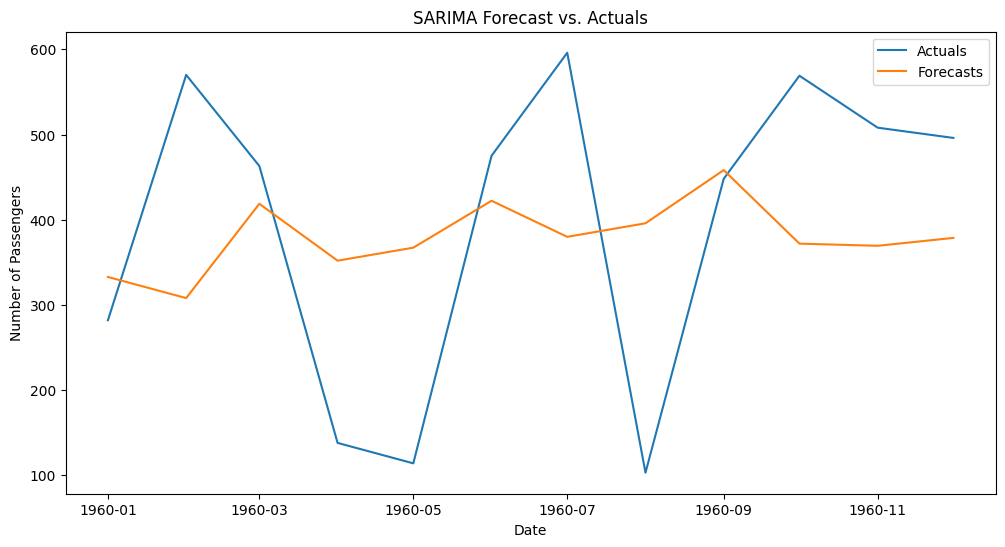

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(test_data.index, test_data['Passengers'], label='Actuals')
ax.plot(forecasts.index, forecasts, label='Forecasts')

ax.set_title('SARIMA Forecast vs. Actuals')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Passengers')
ax.legend()

plt.show()

## Summary:

### Data Analysis Key Findings

*   Based on the ACF and PACF plots of the first-order differenced series, potential non-seasonal orders for the SARIMA model were identified as (1, 1, 1), (1, 1, 0), or (0, 1, 1), with the non-seasonal differencing order (d) being 1.
*   The analysis also suggested potential seasonal orders of (1, 1, 1)$_{12}$, (1, 1, 0)$_{12}$, or (0, 1, 1)$_{12}$, with the seasonal differencing order (D) being 1 and the seasonal period (m) being 12.
*   The most likely initial SARIMA model combination identified was (1, 1, 1)x(1, 1, 1)$_{12}$.
*   The time series data was split into a training set with 132 observations and a testing set with the last 12 observations.
*   The SARIMA(1, 1, 1)x(1, 1, 1)$_{12}$ model was successfully fitted to the training data.
*   Forecasts were generated for the 12-month test period.
*   The model performance on the test set was evaluated, yielding a Mean Absolute Error (MAE) of approximately 154.10, a Mean Squared Error (MSE) of approximately 32517.34, and a Root Mean Squared Error (RMSE) of approximately 180.33.
*   A plot visualizing the forecasted values against the actual values in the test set showed that the model generally captured the trend but struggled to perfectly match the magnitude of the seasonal peaks and troughs.

### Insights or Next Steps

*   The initial SARIMA(1, 1, 1)x(1, 1, 1)$_{12}$ model provides a reasonable starting point, but the evaluation metrics and visual inspection suggest there is room for improvement, particularly in capturing the seasonal amplitude.
*   Explore fitting other potential SARIMA model combinations identified during the ACF/PACF analysis (e.g., (1, 1, 0)x(1, 1, 0)$_{12}$, (0, 1, 1)x(0, 1, 1)$_{12}$) and compare their performance using the calculated metrics (MAE, MSE, RMSE) to find the optimal model.
